In [1]:
import pandas as pd
import json

In [9]:
with open(r'C:\Users\gaikw\Desktop\Data Science\chatbot\data\intents.json','r') as read:
    data = json.load(read)

In [11]:
sentence =[]
tags =[]
response = []
labels = []
for intent in data['intents']:
    for i in intent['patterns']:
        sentence.append(i)
        tags.append(intent['tag'])
    response.append(intent['responses'])
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

In [12]:
num_classes = len(labels)

In [14]:
df = pd.DataFrame()
df=df.assign(promt=sentence,tags=tags)

## Tag Distribution

In [15]:
from collections import Counter
tag,tag_counts=zip(*Counter(df.tags.values).most_common(10))

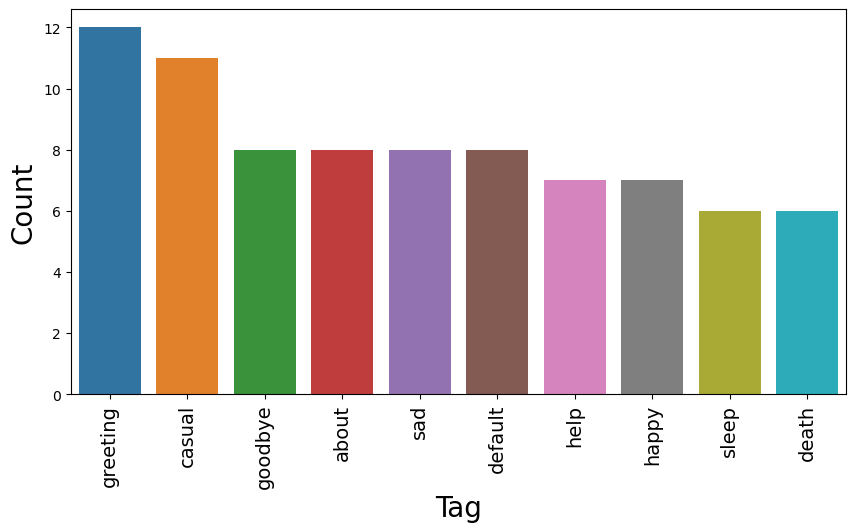

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
ax=sns.barplot(x=list(tag),y=list(tag_counts))
plt.xlabel('Tag',fontsize=20)
plt.ylabel('Count',fontsize=20)
ax.set_xticklabels(tag, rotation=90, fontsize=14)
plt.show()

In [34]:
print(f'The number of sentence {len(sentence)} and tags are {len(tags)}')

The number of sentence 232 and tags are 232


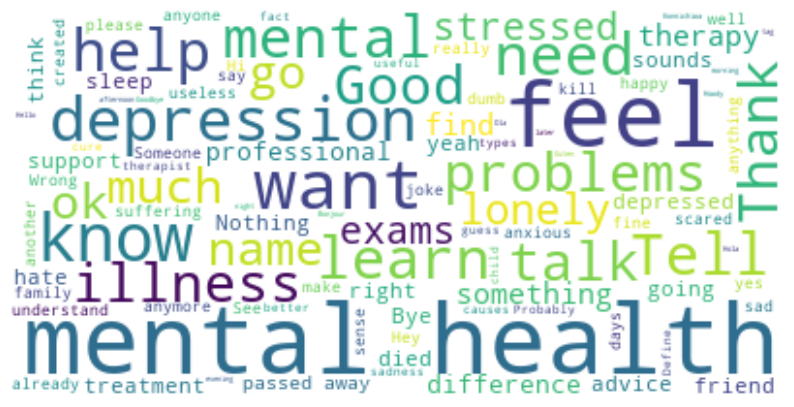

In [58]:
text=' '.join(df['promt'].values)
from wordcloud import WordCloud , STOPWORDS
wordcloud=WordCloud(max_font_size=50, max_words=100,background_color='white',stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

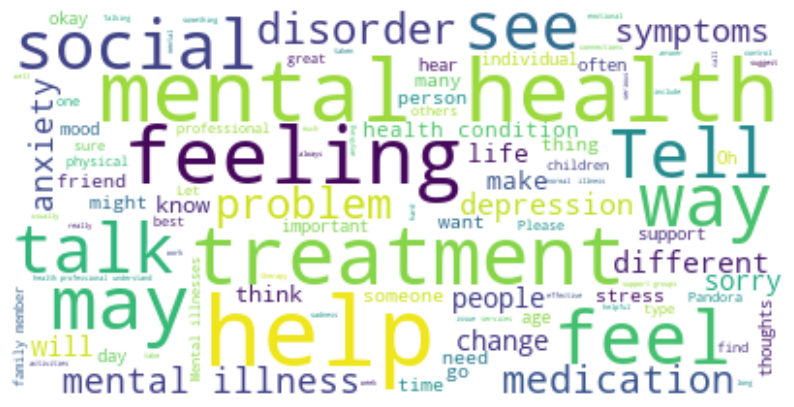

In [63]:
res = ' '.join([' '.join(response[i]) for i in range(len(response))])
res_wordcloud=WordCloud(max_font_size=50, max_words=100,background_color='white',stopwords=STOPWORDS).generate(ans)
plt.figure(figsize=(10,10))
plt.imshow(res_wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    'Hey',
    'Is anyone there?',
    'Hi there',
    'Hello',
    'Hey there',
    'Howdy',
    'Hola',
    'Bonjour',
    'Konnichiwa',
    'Guten tag',
    'Ola'],
   'responses': ['Hello there. Tell me how are you feeling today?',
    'Hi there. What brings you here today?',
    'Hi there. How are you feeling today?',
    'Great to see you. How do you feel currently?',
    "Hello there. Glad to see you're back. What's going on in your world right now?"]},
  {'tag': 'morning',
   'patterns': ['Good morning'],
   'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]},
  {'tag': 'afternoon',
   'patterns': ['Good afternoon'],
   'responses': ['Good afternoon. How is your day going?']},
  {'tag': 'evening',
   'patterns': ['Good evening'],
   'responses': ['Good evening. How has your day been?']},
  {'tag': 'night',
   'patterns': ['Good night'],
   'responses': ['Good night. Get some prop